In [5]:
from pynwb import NWBHDF5IO
import filterframework_to_nwb
# from pynwb import load_namespaces
# load_namespaces('/Users/edeno/Documents/GitHub/franklabnwb/franklabnwb/franklab.namespace.yaml')

io = NWBHDF5IO('/Users/edeno/Documents/GitHub/filterframework_to_nwb/nwb_data/bon_04.nwb', 'r')
nwbfile = io.read()
               
nwbfile

root pynwb.file.NWBFile at 0x4598757904
Fields:
  acquisition: {
    LFP <class 'pynwb.ecephys.LFP'>
  }
  devices: {
    NSpike acquisition system <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    001 <class 'pynwb.ecephys.ElectrodeGroup'>,
    002 <class 'pynwb.ecephys.ElectrodeGroup'>,
    003 <class 'pynwb.ecephys.ElectrodeGroup'>,
    004 <class 'pynwb.ecephys.ElectrodeGroup'>,
    005 <class 'pynwb.ecephys.ElectrodeGroup'>,
    006 <class 'pynwb.ecephys.ElectrodeGroup'>,
    007 <class 'pynwb.ecephys.ElectrodeGroup'>,
    008 <class 'pynwb.ecephys.ElectrodeGroup'>,
    010 <class 'pynwb.ecephys.ElectrodeGroup'>,
    011 <class 'pynwb.ecephys.ElectrodeGroup'>,
    012 <class 'pynwb.ecephys.ElectrodeGroup'>,
    013 <class 'pynwb.ecephys.ElectrodeGroup'>,
    014 <class 'pynwb.ecephys.ElectrodeGroup'>,
    015 <class 'pynwb.ecephys.ElectrodeGroup'>,
    017 <class 'pynwb.ecephys.ElectrodeGroup'>,
    018 <class 'pynwb.ecephys.ElectrodeGroup'>,
    019 <class 'pynwb.ecephy

In [33]:
df = nwbfile.units.to_dataframe()
df.loc[0]

cluster_name                                                d4 t1 c1
sorting_metric                                                    -1
spike_times        [1136146635.3038, 1136146638.406, 1136146638.4...
obs_intervals      [[1136146605.0, 1136147943.0], [1136148061.0, ...
electrodes              x   y         z  imp location            ...
electrode_group    001 pynwb.ecephys.ElectrodeGroup at 0x45964478...
Name: 0, dtype: object

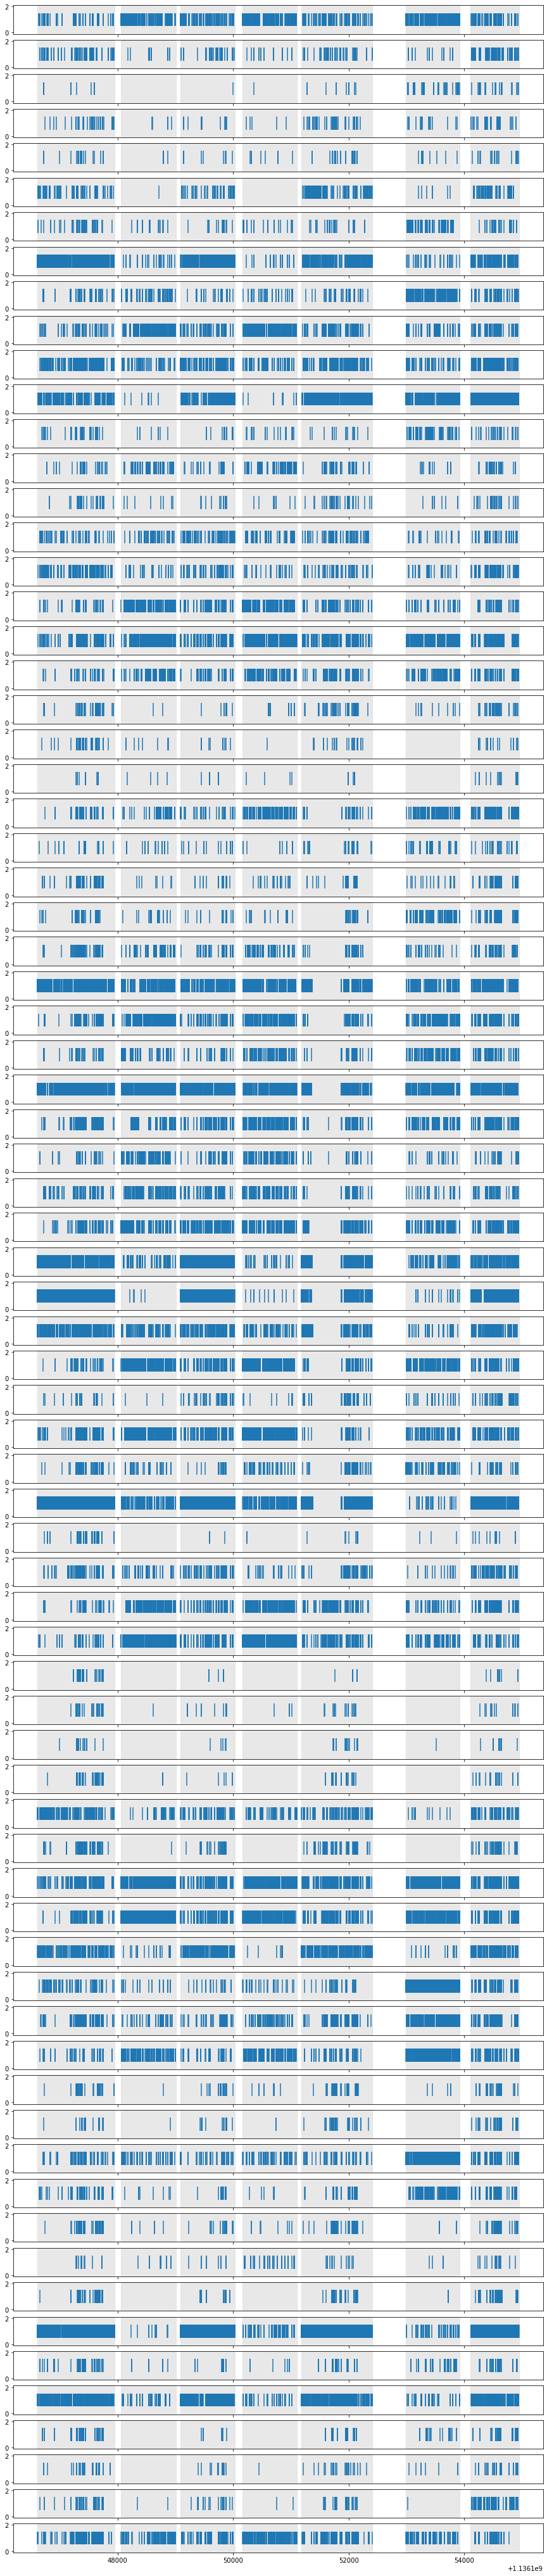

In [29]:
import matplotlib.pyplot as plt

n_neurons = len(df)
fig, axes = plt.subplots(n_neurons, 1, figsize=(15, n_neurons), sharex=True, sharey=True)
for ind in range(n_neurons):
    axes[ind].eventplot(df.loc[ind].spike_times)

    for interval in df.loc[ind].obs_intervals:
        axes[ind].axvspan(*interval, color='lightgrey', alpha=0.5)

In [35]:
nwbfile.trials

In [44]:
{'Name': df.iloc[0].cluster_name,
 'Brain_Area': df.iloc[0].electrode_group.location,
 'Subject': None,
 'Number_of_Trials': 0,
 'Spikes': [
     {"trial_id": 1},
     {"spikes": []},
 ]
}

{'Name': 'd4 t1 c1',
 'Brain_Area': 'CA3',
 'Subject': None,
 'Number_of_Trials': 0,
 'Spikes': [{'trial_id': 1}, {'spikes': []}]}

In [43]:
df.iloc[0]

cluster_name                                                d4 t1 c1
sorting_metric                                                    -1
spike_times        [1136146635.3038, 1136146638.406, 1136146638.4...
obs_intervals      [[1136146605.0, 1136147943.0], [1136148061.0, ...
electrodes              x   y         z  imp location            ...
electrode_group    001 pynwb.ecephys.ElectrodeGroup at 0x45964478...
Name: 0, dtype: object

In [45]:
nwbfile.session_id

'Bon0004'

In [47]:
nwbfile.subject.subject_id

'Bond'

In [53]:
nwbfile.intervals['epochs']

epochs pynwb.epoch.TimeIntervals at 0x4600782608
Fields:
  colnames: ['start_time' 'stop_time' 'exposure' 'task' 'apparatus' 'tags']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    exposure <class 'hdmf.common.table.VectorData'>,
    task <class 'hdmf.common.table.VectorData'>,
    apparatus <class 'hdmf.common.table.VectorData'>,
    tags_index <class 'hdmf.common.table.VectorIndex'>,
    tags <class 'hdmf.common.table.VectorData'>
  )
  description: experimental epochs
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

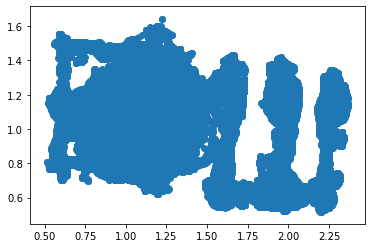

In [82]:
pos = nwbfile.processing['Behavior']['Position']['spatial_series'].data[:]
pos_time = nwbfile.processing['Behavior']['Position']['spatial_series'].timestamps[:]
plt.scatter(pos[:, 0], pos[:, 1])

array([1.13614661e+09, 1.13614661e+09, 1.13614661e+09, ...,
       1.13615495e+09, 1.13615495e+09, 1.13615495e+09])

In [88]:
%conda upgrade pynwb -c conda-forge

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
